# Projeto de Deep Learning - Trabalho de Grupo
---

### Mestrado de Ciência de Dados, 2021/22

<font face="Arial">
<table align = 'left'>
<thead>
  <tr>
    <th>Elaborado por:</th>
    <td></td>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Ana Cunha</td>
    <td>2212836</tr>
  <tr>
    <td>Andreia Ribeiro</td>
    <td>2210806</td>
  </tr>
  <tr>
    <td>Tiago Ribeiro</td>
    <td>2210785</td>
  </tr>
</tbody>
</table></font>

### Instalacão de Bibliotecas

In [2]:
!pip install opendatasets
!pip install visualkeras
!pip install gradio
!apt-get install tree
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 11.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 15.6 MB/s 
     |████████████████████████████████| 212 kB 52.2 MB/s 
     |████████████████████████████████| 2.0 MB 24.8 MB/s 
     |████████████████████████████████| 1.1 MB 52.5 MB/s 
     |████████████████████████████████| 256 kB 58.3 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 140 kB 60.6 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 144 kB 46.7 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |█████████

### Importacão de Bibliotecas

In [3]:
import os                                 # interface c/ sistemas op. diversos
import pandas as pd                       # manipulacão e análise de dados
import numpy as np                        # operacões matemáticas e c/ matrizes
#-------------------------------------------------------------------------------
import matplotlib.pyplot as plt           # gerar gráficos
import matplotlib.image as mpimg          # ler imagens
from PIL import Image                     # ler e mostrar imagens
#-------------------------------------------------------------------------------
import shutil                             # operacões c/ ficheiros
import glob                               # encontrar dos caminhos dos ficheiros
import tree                               # listagem e hierarquia dos ficheiros
from google.colab import files            # tranferência de ficheiros do Colab
from pathlib import Path                  # criacão de objectos de caminhos de ficheiros
#-------------------------------------------------------------------------------
import opendatasets                       # importacão de datasets do Kaggle       
import visualkeras                        # visualicão de arquitetura de redes
from tensorflow import keras              # redes neuronais (alto nível)
from tensorflow.keras import layers       # camadas de redes neuronais (Keras)
from keras.preprocessing.image import ImageDataGenerator # Aumento de Dados
import keras_tuner                        # sintonizacão de hiperparâmetros
#-------------------------------------------------------------------------------
import gradio                             # UI para modelos de aprendizagem automática 

In [4]:
print("versão tensorflow:", keras.__version__)

versão tensorflow: 2.8.0


## 1. Transferência e Análise do Conjunto de Dados

### 1.1. Transferência do Conjunto de Dados


In [5]:
# credenciais para transferênicia de ficheiros: "kaggle.json"
if os.path.isfile("/content/kaggle.json") == False :
  uploaded = files.upload()
# download do conjunto de dados: "The Simpsons Characters Dataset"
opendatasets.download("https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset")

Saving kaggle.json to kaggle.json


100%|██████████| 1.08G/1.08G [00:22<00:00, 50.9MB/s]


### 1.2. Análise da hierarquia e ficheiro do Conjunto de Dados

#### 1.2.1. Estrutura dos diretório relativo aos dados para treino e validacão

In [6]:
# remove pasta duplicada 
shutil.rmtree('/content/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset')
# diretório dos dados de teste e validacão
dir_imagens = '/content/the-simpsons-characters-dataset/simpsons_dataset'
# guarda nomes de categorias
categorias = os.listdir("/content/the-simpsons-characters-dataset/simpsons_dataset")
# mostra estrutura do diretório de treino e validacão
!tree /content/the-simpsons-characters-dataset/simpsons_dataset  -d -C

/content/the-simpsons-characters-dataset/simpsons_dataset
├── abraham_grampa_simpson
├── agnes_skinner
├── apu_nahasapeemapetilon
├── barney_gumble
├── bart_simpson
├── carl_carlson
├── charles_montgomery_burns
├── chief_wiggum
├── cletus_spuckler
├── comic_book_guy
├── disco_stu
├── edna_krabappel
├── fat_tony
├── gil
├── groundskeeper_willie
├── homer_simpson
├── kent_brockman
├── krusty_the_clown
├── lenny_leonard
├── lionel_hutz
├── lisa_simpson
├── maggie_simpson
├── marge_simpson
├── martin_prince
├── mayor_quimby
├── milhouse_van_houten
├── miss_hoover
├── moe_szyslak
├── ned_flanders
├── nelson_muntz
├── otto_mann
├── patty_bouvier
├── principal_skinner
├── professor_john_frink
├── rainier_wolfcastle
├── ralph_wiggum
├── selma_bouvier
├── sideshow_bob
├── sideshow_mel
├── snake_jailbird
├── troy_mcclure
└── waylon_smithers

42 directories


#### 1.2.2. Diretório das imagens de teste 

In [7]:
# diretório de ficheiros de teste
!tree /content/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset -C 
dir_teste = "/content/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset"

/content/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset
├── abraham_grampa_simpson_0.jpg
├── abraham_grampa_simpson_10.jpg
├── abraham_grampa_simpson_11.jpg
├── abraham_grampa_simpson_12.jpg
├── abraham_grampa_simpson_13.jpg
├── abraham_grampa_simpson_14.jpg
├── abraham_grampa_simpson_15.jpg
├── abraham_grampa_simpson_16.jpg
├── abraham_grampa_simpson_17.jpg
├── abraham_grampa_simpson_18.jpg
├── abraham_grampa_simpson_19.jpg
├── abraham_grampa_simpson_1.jpg
├── abraham_grampa_simpson_20.jpg
├── abraham_grampa_simpson_21.jpg
├── abraham_grampa_simpson_22.jpg
├── abraham_grampa_simpson_23.jpg
├── abraham_grampa_simpson_24.jpg
├── abraham_grampa_simpson_25.jpg
├── abraham_grampa_simpson_26.jpg
├── abraham_grampa_simpson_27.jpg
├── abraham_grampa_simpson_28.jpg
├── abraham_grampa_simpson_29.jpg
├── abraham_grampa_simpson_2.jpg
├── abraham_grampa_simpson_30.jpg
├── abraham_grampa_simpson_31.jpg
├── abraham_grampa_simpson_32.jpg
├── abraham_grampa_simpson_33.jp

### 1.3. Visualizacão das imagens do dataset

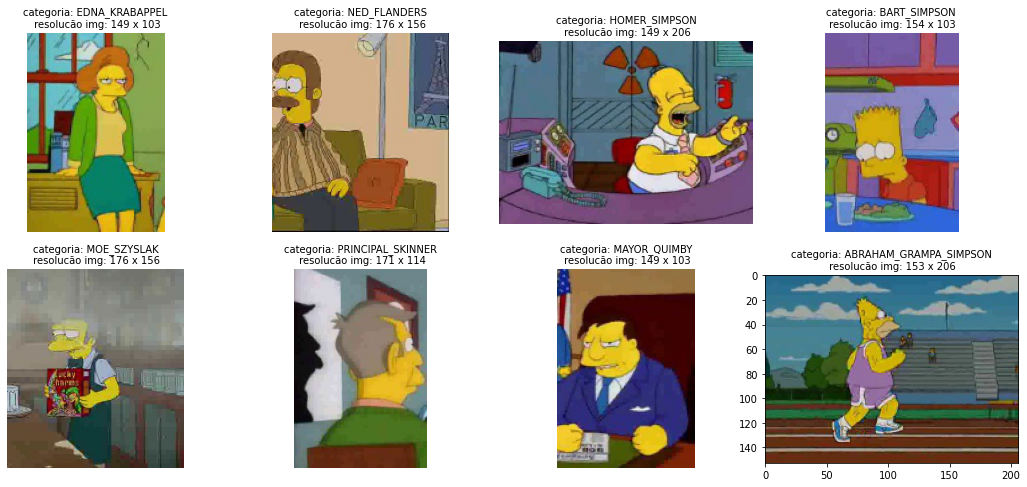

In [8]:
# escolhe 6 imagens aleatóriamente do diretório de teste
imagens = np.random.choice(os.listdir(dir_teste), 8)

plt.figure(figsize=(15,10))
colunas = 4
for i, image in enumerate(imagens):
    plt.axis("off")
    plt.subplot(len(imagens) / colunas + 1, colunas, i + 1)
    img = mpimg.imread(dir_teste + "/"+ image)
    plt.imshow(img)
    plt.title("categoria: " + image[0:image.rfind("_")].upper() + "\n resolucão img: "+ 
              str(img.shape[0]) + " x " + str(img.shape[1]), fontsize =10)
plt.tight_layout()

## 2. Pré-processamento do Conjunto de Dados

### 2.1 Organizacão das imagens para teste

In [9]:
# cria diretórios para cada categoria (personagem)
for cat in categorias:
  if not os.path.exists(os.path.join(dir_teste, cat)):
    os.mkdir(os.path.join(dir_teste, cat))

# procura dir_teste por *.jpg e move-os p/ os diretórios correpondentes
ficheiro = []
for ficheiro in os.listdir(dir_teste):
    if ficheiro.endswith('.jpg'):
      shutil.move(dir_teste + "/" + ficheiro, dir_teste + "/" + 
                  ficheiro[0:ficheiro.rfind("_")])

### 2.3 Definicão de Hiperparâmetros

 <p align = 'center'><strong> Hiperpârametros iniciais </strong></p>

Hiperparâmetro | Configuracão
:--|:--
Aumento de Dados | Nenhum
Regularizacão | Nenhuma
Optimizador | Adam
Taxa de aprendizagem | 3e-4
Funcão de custo | Entropia cruzada
Dimensão do lote | 16
Épocas | 30
Inicializacão dos pesos | Inicializacão He


In [10]:
dim_img = 64            # dimensão das imagens após redimensionamento: 64 por 64 pixel
tam_lote = 16           # ou batch size 
epocas = 30             # épocas de treino
prop_valid = 0.10       # proporcão do dados para validacão (10% do dados destinados para treino e validacão)
semente = 23            # semente para geracão de números aleatórios
dropout_rate_1 = 0.2    # taxa de dropout 1
dropout_rate_2 = 0.3    # taxa de dropout 2
#--formulário-----------------------------------------
#@title  2.3.1. Escolha de Hiperpârametros
aumento_dados = 'False' #@param ["True", "False"] 
regularizacao = "None" #@param ["None", "L2"] 
optimizador = "Adam" #@param ["Adam", "SGD"]
taxa_apredizagem = 3e-4 #@param {type:"slider", min:0.0001, max:1, step:0.0001}
funcao_custo = 'categorical_crossentropy' #@param ['categorical_crossentropy', 'Kullback_Leibler_divergence']
#-------------------------------------------
if funcao_custo == 'categorical_crossentropy':loss = "c_ce"
else: loss = "kl_d"
#--Imprime configuracões-----------------------------------------
print("\033[1mConfiguracão do Modelo: \033[0m")
print(" Dimensão das imagens de entrada: " + str(dim_img) + " x " + str(dim_img))
print(" Tamanho lote (batch size): " + str(tam_lote))
print(" Épocas de treino: " + str(epocas))
print(" Prop. dados de Validacão: 9.5 %")
print("\033[1mHiperparâmetros configuráveis: \033[0m")
print(" Aumento de dados: " + str(aumento_dados))
print(" Regularizacão: " + str(regularizacao)+ " (se sim, L2 = 0.01)")
print(" Optimizador: " + str(optimizador) + " com taxa de aprendizagem " + str(taxa_apredizagem))
print(" Funcão de custo: " + str(funcao_custo))

Configuracão do Modelo: 
 Dimensão das imagens de entrada: 64 x 64
 Tamanho lote (batch size): 16
 Épocas de treino: 30
 Prop. dados de Validacão: 9.5 %
Hiperparâmetros configuráveis: 
 Aumento de dados: False
 Regularizacão: None (se sim, L2 = 0.01)
 Optimizador: Adam com taxa de aprendizagem 0.0003
 Funcão de custo: categorical_crossentropy


#### 2.3.2. Processamento de Hiperâmetros

In [11]:
# guarda configuracão do modelo numa string
conf_modelo = "DA_" + str(aumento_dados) + "_REG_"+ regularizacao + "_OPT_"+ optimizador + "_LR_"+ str(taxa_apredizagem) + "_LOSS_" + loss
print("String de configuracão: " + conf_modelo)

# processa dados do formulário
aumento_dados = aumento_dados == "True"
if regularizacao == "L2":
  reg = keras.regularizers.l2(0.01)
else:
  reg = None
if loss == "Kullback_Leibler_divergence":
  funcao_custo= 'keras.losses.KLDivergence(from_logits=True)'
else: 
  funcao_custo = "keras.losses.BinaryCrossentropy()"

if optimizador == "Adam":
  # Adam => Adaptive Moment Estimation
  opt = "keras.optimizers.Adam(learning_rate = taxa_apredizagem, beta_1=0.9, beta_2=0.999, epsilon=1e-07)"
else:
  # SGD => Stochastic Gradient Descent 
  opt = "keras.optimizers.SGD(learning_rate = taxa_apredizagem, momentum = 0.26588)"

# guarda optimizador, regularizador e funcão de custo num dicionário
hiper = {"reg": reg, "opt": opt, "loss": funcao_custo}

String de configuracão: DA_False_REG_None_OPT_Adam_LR_0.0003_LOSS_c_ce


### 2.4. Divisão do Conjunto de Dados: Treino, Validacão e Teste

<table align = 'left'>
<thead>
  <tr>
    <th colspan="3">Constituicão do Conjunto de Dados</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Imagens de treino</td>
    <td>18840</td>
    <td>85,94 %</td>
  </tr>
  <tr>
    <td>Imagens de validacão</td>
    <td>2093<br></td>
    <td>9,54 %</td>
  </tr>
  <tr>
    <td>Imagens de teste</td>
    <td>990</td>
    <td>4,51 %</td>
  </tr>
  <tr>
    <td><strong>Total</strong></td>
    <td>21923</td>
    <td>100 %</td>
  </tr>
</tbody>
</table>



  

  




In [12]:
def divide_dados(aumento_dados):

  if aumento_dados == True:
    # Configura aumento de dados
    print("\033[1mCOM Aumento de Dados\033[0m \n")
    treino_gen = keras.preprocessing.image.ImageDataGenerator(
        rotation_range = 0.3,           #
        width_shift_range = 0.2,        #
        height_shift_range = 0.2,       #
        shear_range = 0.2,              #
        fill_mode='nearest',            #     
        vertical_flip = True,           #
        validation_split = prop_valid   # 10 % das imagens para validacão 
        )

    # Imagens de validacão não sofrem alteracões
    validacao_gen = keras.preprocessing.image.ImageDataGenerator(
        validation_split=prop_valid     # 10 % das imagens para validacão 
    )

    treino_dados = treino_gen.flow_from_directory(
        directory = dir_imagens,        # diretório das imagens
        target_size=(dim_img, dim_img), # Redimensionamento das imagens
        class_mode="categorical",       # 
        color_mode="rgb",               # JPEG: 3 canais RGB
        batch_size = tam_lote,          # Valor por defeito 32
        shuffle = True,                 # embaralhamanto para todas as categorias estarem representadas
        seed = semente,                 # semente 
        subset = "training",            # objeto de treino
        interpolation="bilinear"        #
    )

    validacao_dados = validacao_gen.flow_from_directory(
        directory = dir_imagens,        # diretório das imagens
        target_size=(dim_img, dim_img), # Redimensionamento das imagens
        class_mode="categorical",       # 
        color_mode="rgb",               # JPEG: 3 canais RGB
        batch_size = tam_lote,          # Valor por defeito 32
        shuffle = True,                 # embaralhamanto para todas as categorias estarem representadas
        seed = semente,                 # semente = 42 ou 12      
        subset = "validation",          # objeto de validacão
        interpolation="bilinear"        #
    )
  else:
    # Sem aumento de dados
    print("\033[1mSEM Aumento de Dados\033[0m \n")
    treino_dados = keras.preprocessing.image_dataset_from_directory(
        directory = Path(dir_imagens),  
        labels="inferred",              # as categorias são geradas a partir da estrutura do directório
        label_mode="categorical",       # 
        color_mode="rgb",               # JPEG: 3 canais RGB
        batch_size=tam_lote,            # Valor por defeito 32
        image_size=(dim_img, dim_img),  # Redimensionamento das imagens
        shuffle = True,                 # embaralhamanto para todas as categorias estarem representadas
        seed= semente,                  # semente = 42 ou 12
        validation_split = prop_valid,  # 10 % das imagens para validacão        
        subset = "training",            # objeto de treino
        interpolation="bilinear"        #
    )
    validacao_dados = keras.preprocessing.image_dataset_from_directory(
        directory = Path(dir_imagens),   
        labels="inferred",              # labels are generated from the directory structure
        label_mode="categorical",       # 
        color_mode="rgb",               # JPEG: 3 canais 
        batch_size = tam_lote,          # Valor por defeito 32
        image_size=(dim_img, dim_img),  #
        shuffle = True,                 #
        seed = semente,                 # 
        validation_split = prop_valid,  # 15 % das imagens para validacão        
        subset = "validation",          #
        interpolation="bilinear"        #
    )

  teste_dados = keras.preprocessing.image_dataset_from_directory(
      directory = Path(dir_teste),    #
      labels="inferred",              # 
      label_mode="categorical",       # 
      color_mode="rgb",               # JPEG: 3 canais 
      batch_size = tam_lote,          # Valor por defeito 32
      image_size=(dim_img, dim_img),  #
      seed = semente,                 #      
      subset = None,                  #
      interpolation="bilinear"        #
    )
  print("Using 990 files for testing.")
  return treino_dados, validacao_dados, teste_dados

In [13]:
treino_dados, validacao_dados, teste_dados = divide_dados(aumento_dados)

SEM Aumento de Dados 

Found 20933 files belonging to 42 classes.
Using 18840 files for training.
Found 20933 files belonging to 42 classes.
Using 2093 files for validation.
Found 990 files belonging to 42 classes.
Using 990 files for testing.


### 2.5 Imagens após Redimensioamento

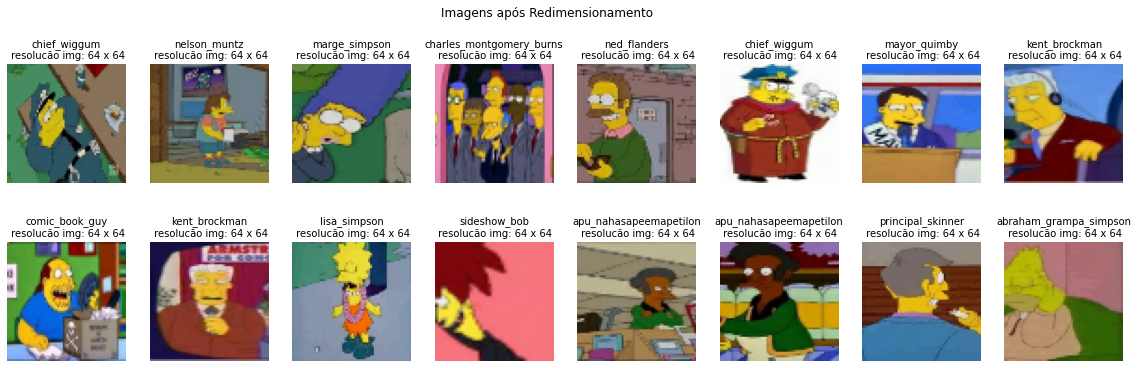

In [14]:
class_names = treino_dados.class_names

### Visualizacão dum lote de imagens de dados
plt.figure(figsize=(20, 6))
for images, labels in teste_dados.take(1):
    for i in range(tam_lote):
      ax = plt.subplot(2, 8, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.suptitle("Imagens após Redimensionamento")
      plt.title(class_names[np.argmax(labels[i])]+ "\n resolucão img: "+ 
              str(images.shape[1]) + " x " + str(images.shape[2]), fontsize = 10)
      plt.axis("off")
      
plt.show()

## 3. Funcões várias

### 3.1. Funcão para gráficos das métricas

In [15]:
def graficos_metricas(history, model, conf_modelo):
  plt.style.use('fast')
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))

  # Cria Gráfico de Acurácia
  ax1.plot(np.array(history.history['accuracy'])*100,"limegreen",  marker =".")
  ax1.plot(np.array(history.history['val_accuracy'])*100, "orangered" ,  marker =".")
  ax1.set_title('Acurácia do ' + model.name + '\n'+ "Configuracão: "+ conf_modelo)
  ax1.set_ylabel('Acurácia (%)')
  ax1.set_xlabel('Época')
  ax1.legend(['treino', 'validacão'], loc = 'best')
  ax1.grid(linestyle = '--', linewidth = 0.4)

  # Cria caixa indicando o máximo de acurácia de validacão
  # (objetivo: criar nota com valor relevante dentro do espaco do gráfico)
  xmax = np.argmax(history.history['val_accuracy'])
  ymax = max(history.history['val_accuracy'])*100
  text= "Acur. Val.:{:.3f} %".format(ymax)
  # lw, linewidth; fc, facebolor; ec, edgecolor
  bbox_props = dict(boxstyle="round,,pad=0.3", fc="w", ec="k", lw=0.5)   
  arrowprops1 = dict(arrowstyle="->",connectionstyle="arc3,rad=0.3")
  kw = dict(xycoords='data',textcoords="offset points",
                arrowprops=arrowprops1, bbox=bbox_props, ha="right", va="center")
  ax1.annotate(text, xy=(xmax, ymax), xytext=(-15,-30), **kw)
  ax1.set_ylim(top = max(history.history['val_accuracy'] + 
                          history.history['accuracy'])*100 + 1)
  
  # Cria Gráfico de Custo
  ax2.plot(history.history['loss'], "limegreen",  marker =".")
  ax2.plot(history.history['val_loss'],"orangered" ,  marker =".")
  ax2.set_title('Custo do '+ model.name +'\n'+ "Configuracão: "+ conf_modelo)
  ax2.set_ylabel('Custo')
  ax2.set_xlabel('Época')
  ax2.legend(['treino', 'validacão'], loc = 'best')
  ax2.grid(linestyle = '--', linewidth = 0.5)
  ax2.set_ylim(ymin=0)

  # Cria caixa indicando o minímo de custo de validacão
  xmin = np.argmin(history.history['val_loss'])
  ymin = min(history.history['val_loss'])
  text2= "Custo. Val.:{:.3f}".format(ymin)
  bbox_props2 = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw = 0.5)
  arrowprops2 = dict(arrowstyle="->",connectionstyle="arc3,rad=-0.3")
  kw2 = dict(xycoords='data',textcoords="offset points",
               arrowprops=arrowprops2, bbox=bbox_props2, ha="right", va="center")
  ax2.annotate(text2, xy=(xmin, ymin), xytext=(70, 35), **kw2)

  plt.tight_layout()

### 3.2. Funcão para compilar modelos

In [16]:
def compila_modelo(model, **hiper):
  model.compile(
      optimizer = eval(hiper["opt"]),
      loss= eval(hiper["loss"]),
      metrics=['accuracy'])
      
  model.summary(expand_nested=True)
  return model

### 3.3. Funcão para desenhar arquitetura do modelo

In [17]:
def desenha_modelo(model):
  keras.utils.plot_model(
      model,
      to_file="{}.png".format(model.name),
      show_shapes=True,
      show_dtype=False,
      show_layer_names=True,
      rankdir="LR",          # desenha na horizontal
      expand_nested=False,
      dpi=60,
      show_layer_activations = True,
  )

### 3.4. Funcão para treinar os modelos

In [18]:
def treina_modelo(model, *args):
  history = model.fit(treino_dados, 
                      validation_data = validacao_dados,
                      epochs = epocas,
                      callbacks = args)
  return history

### 3.5. Definicão de funcões *callback*

In [19]:
val_loss_cb = [keras.callbacks.ModelCheckpoint(
    filepath='model.{epoch:02d}-{val_accuracy:.2f}.h5',
    save_best_only = True,
    monitor = "val_accuracy")] 

In [20]:
tensor_board_cb = keras.callbacks.TensorBoard(
    log_dir = "logs",      # diretório onde guarda registos 
    histogram_freq = 1,    # freq. (epochs) de computacão de histogramas pesos 
    update_freq = "batch"  # atualiza todas as epochs 
    )

### 3.6. Funcão para guardar métricas em ficheiro *CSV*

In [21]:
def guarda_historico(history, modelo, conf_modelo):
  # converte history em dataframe
  hist_df = pd.DataFrame(history.history)
  hist_df["config_modelo"] = conf_modelo 
  # guarda csv 
  hist_csv_file = 'history_{}.csv'.format(modelo.name)
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)
      files.download(hist_csv_file)

### 3.7. Funcão para carregar e treinar modelos guardados 

In [22]:
def carrega_treina_modelo_h5(file_path):
  # carrega modelo guardado 
  loaded_model = keras.models.load_model(file_path)
  # treina
  history = treina_modelo(loaded_model, val_loss_cb)
  return history, loaded_model

## 4. Criacão dos Modelos

### 4.1. Modelo S Base

In [23]:
def cria_modelo_s():

  # extrai regularizador L2 (l2=0.01)
  # Regularizador para aplicar uma penalização na saída da camada
  reg = hiper.get("reg")

  entradas = keras.Input(shape = (dim_img, dim_img, 3), name = "entradas") 
  
  normalizador = layers.Rescaling(1./255, name = "normalizador")(entradas) # Camada de normalizacão

  conv_1 = layers.Conv2D(                # Num. parametros 3*3*32 = 288
      filters = 32,                      # filtros
      kernel_size = (3,3),               # tamanho dos filtros
      strides=(1, 1),                    # 
      activation = "relu",               # funcao de ativacão ReLU 
      use_bias=True,                     # 
      kernel_initializer = "he_normal",  # He initialization 
      activity_regularizer= reg,         # regularizador: nenhum ou L2
      kernel_regularizer=None,           # nenhum 
      bias_regularizer=None,             # nenhum
      padding = "same",                  # dimensão da imagem não é reduzida após convolucão
      name = "conv_1")(normalizador)   

  # stride 2
  conv_2 = layers.Conv2D(                
      filters = 32, kernel_size = (3,3), strides=(2, 2), activation = "relu",                
      kernel_initializer = "he_normal", activity_regularizer= reg, kernel_regularizer=None, 
      bias_regularizer=None, padding = "same", name = "conv_2")(conv_1)
  
  # imagem fica com dimensoes 2 vezes menores após Polling
  max_pool1 = layers.MaxPooling2D(       
      pool_size = (2, 2), name = "max_pool_1" )(conv_2)
  
  # Num. parametros 3*3*64 = 288
  conv_3 = layers.Conv2D(
      filters = 64, kernel_size = (3,3), activation = "relu",
      activity_regularizer = reg, kernel_regularizer=None, bias_regularizer=None, 
      kernel_initializer = "he_normal", padding = "same",
      name = "conv_3")(max_pool1)

  conv_4 = layers.Conv2D( 
      filters = 64, kernel_size = (3,3), activation = "relu",
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None,               
      kernel_initializer = "he_normal",padding = "same",name = "conv_4")(conv_3)
  
  max_pool2 = layers.MaxPooling2D(pool_size = (2, 2), name = "max_pool_2")(conv_4)

  conv_5 = layers.Conv2D(
      filters = 128, kernel_size = (3,3), activation = "relu",
      activity_regularizer = reg, kernel_regularizer=None, bias_regularizer=None, 
      kernel_initializer = "he_normal", padding = "same", name = "conv_5")(max_pool2)

  achatamento = layers.Flatten(name = "achatamento")(conv_5)

  densa1 = layers.Dense(
    units = 1024, activation = "relu", use_bias=True, kernel_initializer="he_normal",
    activity_regularizer = reg , bias_initializer="zeros", name = "densa_1")(achatamento)
  
  densa2 = layers.Dense( 
      units = 512, activation = "relu", use_bias=True, kernel_initializer="he_normal",
      activity_regularizer = reg, bias_initializer="zeros", name = "densa_2")(densa1)

  saidas = layers.Dense(
      units = 42, activation='softmax', name='saidas')(densa2)
  
  model = keras.Model(inputs = entradas, outputs = saidas, name='Modelo_S')
  
  return model

### 4.2. Modelo S com Regularizacão Dropout



In [24]:
def cria_modelo_s_dropout(dropout_rate_1, dropout_rate_2):

  # extrai regularizador
  reg = hiper.get("reg")
  #reg = None

  entradas = keras.Input(shape = (dim_img, dim_img, 3), name = "entradas") 

  normalizador = layers.Rescaling(1./255, name = "normalizador")(entradas) 

  conv_1 = layers.Conv2D(filters = 32,kernel_size = (3,3),activation = "relu",
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None,               
      kernel_initializer = "he_normal", padding = "same", name = "conv_1")(normalizador)

  dropout0 = layers.Dropout(dropout_rate_1)(conv_1)

  conv_2 = layers.Conv2D(filters = 32, kernel_size = (3,3),strides=(2, 2),
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None, 
      activation = "relu", kernel_initializer = "he_normal",padding = "same", 
      name = "conv_2")(dropout0)

  dropout1 = layers.Dropout(dropout_rate_1)(conv_2)
  
  max_pool1 = layers.MaxPooling2D(pool_size = (2, 2), name = "max_pool_1")(dropout1)
  
  conv_3 = layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu",
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None,
      kernel_initializer = "he_normal", padding = "same", name = "conv_3")(max_pool1)

  dropout1_2 = layers.Dropout(dropout_rate_1)(conv_3)
  
  conv_4 = layers.Conv2D(filters = 64, kernel_size = (3,3),activation = "relu",
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None,
      kernel_initializer = "he_normal", padding = "same", name = "conv_4")(dropout1_2)
  
  dropout2 = layers.Dropout(dropout_rate_1)(conv_4)

  max_pool2 = layers.MaxPooling2D( pool_size = (2, 2), name = "max_pool_2")(dropout2)

  conv_5 = layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu",
     activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None,
     kernel_initializer = "he_normal", padding = "same", name = "conv_5")(max_pool2)

  dropout3 = layers.Dropout(dropout_rate_1)(conv_5)

  achatamento = layers.Flatten(name = "achatamento")(dropout3)

  densa1 = layers.Dense(
    units = 1024, activation = "relu", use_bias=True, kernel_initializer="he_normal",
    activity_regularizer = reg , bias_initializer="zeros", name = "densa_1")(achatamento)

  dropout4 = layers.Dropout(dropout_rate_2)(densa1)

  densa2 = layers.Dense( 
      units = 512, activation = "relu", use_bias=True, kernel_initializer="he_normal",
      activity_regularizer = reg, bias_initializer="zeros", name = "densa_2")(dropout4)

  dropout5 = layers.Dropout(dropout_rate_2)(densa2)

  saidas = layers.Dense(units = 42, activation='softmax', name='saidas')(dropout4)

  model = keras.Model(inputs = entradas, outputs = saidas, name='Modelo_S_Dropout')
  
  return model

### 4.3. Modelo S com Regularizacão Batch 

In [25]:
def cria_modelo_s_br():

  # extrai regularizador
  reg = hiper.get("reg")

  entradas = keras.Input(shape = (dim_img, dim_img, 3), name = "entradas") 
  normalizador = layers.Rescaling(1./255, name = "normalizador")(entradas) 
  conv_1 = layers.Conv2D(filters = 32,kernel_size = (3,3), activation = None,
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None,               
      kernel_initializer = "he_normal", padding = "same", name = "conv_1")(normalizador)

  batch_1 = layers.BatchNormalization()(conv_1)
  relu1 = layers.ReLU()(batch_1)

  conv_2 = layers.Conv2D(filters = 32, kernel_size = (3,3),strides=(2, 2),
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None, 
      activation = None, kernel_initializer = "he_normal",padding = "same", 
      name = "conv_2")(relu1)

  batch_2 = layers.BatchNormalization()(conv_2)
  relu2 = layers.ReLU()(batch_2)                  

  max_pool1 = layers.MaxPooling2D(pool_size = (2, 2), name = "max_pool_1")(relu2)
  conv_3 = layers.Conv2D(filters = 64, kernel_size = (3,3), activation = None,
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None,
      kernel_initializer = "he_normal", padding = "same", name = "conv_3")(max_pool1)
 
  batch_3 = layers.BatchNormalization()(conv_3)
  relu3 = layers.ReLU()(batch_3)  
  
  conv_4 = layers.Conv2D(filters = 64, kernel_size = (3,3), activation = None,
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None,
      kernel_initializer = "he_normal", padding = "same", name = "conv_4")(relu3)
   
  batch_4 = layers.BatchNormalization()(conv_4)
  relu4 = layers.ReLU()(batch_4)  
  
  max_pool2 = layers.MaxPooling2D( pool_size = (2, 2), name = "max_pool_2")(relu4)
  conv_5 = layers.Conv2D(filters = 128, kernel_size = (3,3), activation = None,
      activity_regularizer= reg, kernel_regularizer=None, bias_regularizer=None,
      kernel_initializer = "he_normal", padding = "same",name = "conv_5")(max_pool2)
 
  batch_5 = layers.BatchNormalization()(conv_5)
  relu5 = layers.ReLU()(batch_5)  
  
  achatamento = layers.Flatten(name = "achatamento")(relu5)
  densa1 = layers.Dense(
    units = 1024, activation = "relu", use_bias=True, kernel_initializer="he_normal",
    activity_regularizer = reg, bias_initializer="zeros", name = "densa_1")(achatamento)
 
  batch_6 = layers.BatchNormalization()(densa1)
  relu6 = layers.ReLU()(batch_6)  
  
  densa2 = layers.Dense(
      units = 512, activation = "relu", use_bias=True, kernel_initializer="he_normal",
      activity_regularizer = reg, bias_initializer="zeros", name = "densa_2")(relu6)
 
  batch_7 = layers.BatchNormalization()(densa2)
  relu7 = layers.ReLU()(batch_7)  
  
  saidas = layers.Dense(units = 42, activation='softmax', name='saidas')(relu7)


  model = keras.Model(inputs = entradas, outputs = saidas, name='Modelo_S_Batch_Norm')
  
  return model

## 5. Experiência

### 5.1. Modelo_S

In [ ]:
modelo_s = cria_modelo_s()

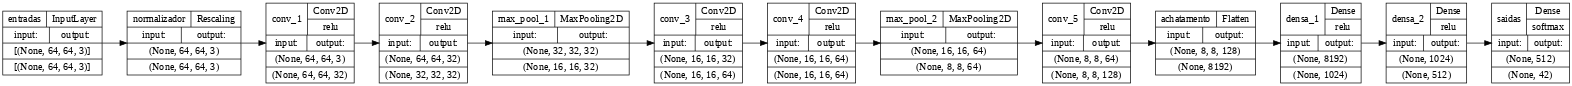

In [ ]:
desenha_modelo(modelo_s)
Image.open('/content/{}.png'.format(modelo_s.name))

In [ ]:
modelo_s = compila_modelo(modelo_s, **hiper)

Model: "Modelo_S"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entradas (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 normalizador (Rescaling)    (None, 64, 64, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 16, 16, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 64)        18496     
                                                                 
 conv_4 (Conv2D)             (None, 16, 16, 64)        369

In [ ]:
# loaded_model = keras.models.load_model("/content/modelo_s_dr_kl_d")
# score = loaded_model.evaluate(teste_dados, batch_size = tam_lote, verbose = 1)

62/62 [==============================] - 12s 14ms/step - loss: 0.0029 - accuracy: 0.9869


[0.0028748095501214266, 0.986868679523468]

#### 5.1.1. Treino do Modelo S

In [ ]:
hist_modelo_s = treina_modelo(modelo_s, val_loss_cb)

Epoch 1/30
1178/1178 [==============================] - 26s 20ms/step - loss: 0.0737 - accuracy: 0.4121 - val_loss: 0.0518 - val_accuracy: 0.6039
Epoch 2/30
1178/1178 [==============================] - 35s 29ms/step - loss: 0.0405 - accuracy: 0.6928 - val_loss: 0.0402 - val_accuracy: 0.7258
Epoch 3/30
1178/1178 [==============================] - 33s 28ms/step - loss: 0.0215 - accuracy: 0.8515 - val_loss: 0.0404 - val_accuracy: 0.7649
Epoch 4/30
1178/1178 [==============================] - 33s 28ms/step - loss: 0.0093 - accuracy: 0.9493 - val_loss: 0.0431 - val_accuracy: 0.7702
Epoch 5/30
1178/1178 [==============================] - 37s 31ms/step - loss: 0.0049 - accuracy: 0.9799 - val_loss: 0.0507 - val_accuracy: 0.7783
Epoch 6/30
1178/1178 [==============================] - 35s 30ms/step - loss: 0.0035 - accuracy: 0.9878 - val_loss: 0.0505 - val_accuracy: 0.7941
Epoch 7/30
1178/1178 [==============================] - 39s 33ms/step - loss: 0.0029 - accuracy: 0.9907 - val_loss: 0.0479 -

In [ ]:
guarda_historico(hist_modelo_s, modelo_s, conf_modelo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

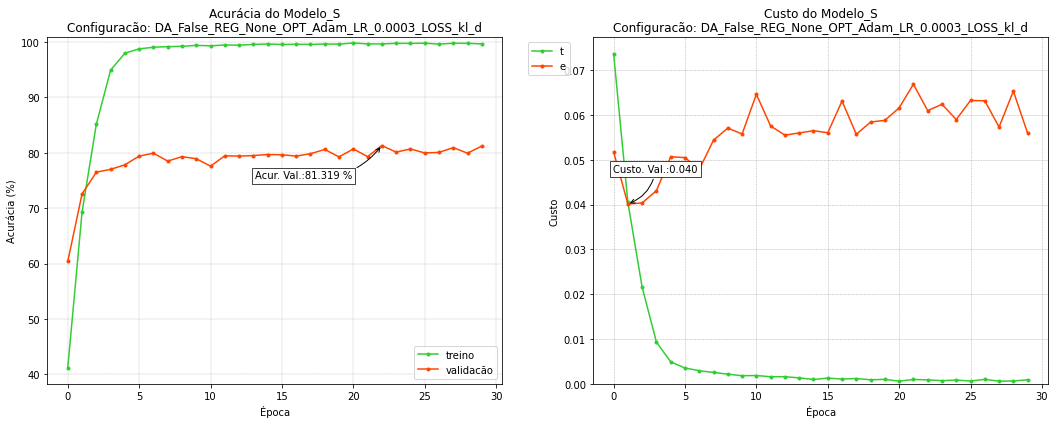

In [ ]:
graficos_metricas(hist_modelo_s, modelo_s, conf_modelo)

#### 5.1.2. Avaliacão do Modelo S

In [ ]:
score_s = modelo_s.evaluate(teste_dados, batch_size = tam_lote, verbose = 1)

62/62 [==============================] - 1s 17ms/step - loss: 0.0045 - accuracy: 0.9798


In [ ]:
modelo_s.save("model_s_SGD", save_format='h5')

###5.2. Modelo S com Dropout

In [ ]:
modelo_s_dp = cria_modelo_s_dropout(dropout_rate_1, dropout_rate_2)

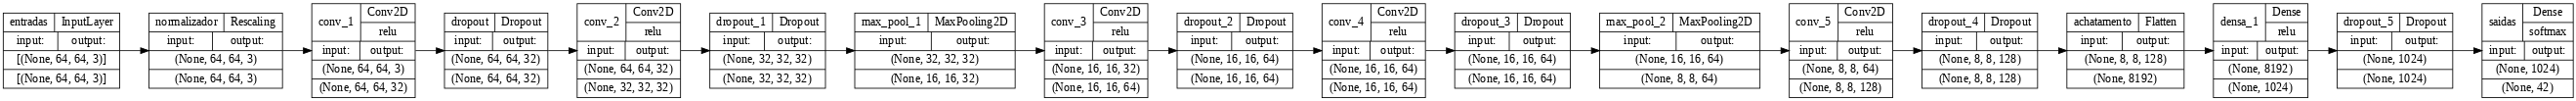

In [ ]:
desenha_modelo(modelo_s_dp)
Image.open('/content/{}.png'.format(modelo_s_dp.name))

In [ ]:
modelo_s_dp = compila_modelo(modelo_s_dp, **hiper)

Model: "Modelo_S_Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entradas (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 normalizador (Rescaling)    (None, 64, 64, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 16, 16, 32)   

#### 5.2.1. Treino do Modelo com Dropout


In [ ]:
hist_modelo_s_dp = treina_modelo(modelo_s_dp, val_loss_cb)

Epoch 1/30
1178/1178 [==============================] - 259s 219ms/step - loss: 0.0977 - accuracy: 0.1701 - val_loss: 0.0922 - val_accuracy: 0.2255
Epoch 2/30
1178/1178 [==============================] - 257s 218ms/step - loss: 0.0791 - accuracy: 0.3338 - val_loss: 0.0744 - val_accuracy: 0.4109
Epoch 3/30
1178/1178 [==============================] - 259s 220ms/step - loss: 0.0655 - accuracy: 0.4734 - val_loss: 0.0623 - val_accuracy: 0.5466
Epoch 4/30
1178/1178 [==============================] - 257s 218ms/step - loss: 0.0561 - accuracy: 0.5588 - val_loss: 0.0585 - val_accuracy: 0.5772
Epoch 5/30
1178/1178 [==============================] - 260s 221ms/step - loss: 0.0481 - accuracy: 0.6274 - val_loss: 0.0517 - val_accuracy: 0.6455
Epoch 6/30
1178/1178 [==============================] - 259s 220ms/step - loss: 0.0407 - accuracy: 0.6927 - val_loss: 0.0489 - val_accuracy: 0.6622
Epoch 7/30
1178/1178 [==============================] - 260s 221ms/step - loss: 0.0344 - accuracy: 0.7525 - val_

In [ ]:
guarda_historico(hist_modelo_s_dp, modelo_s_dp, conf_modelo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#modelo_s_dp.save("modelo_s_dr_sgd", save_format='h5')

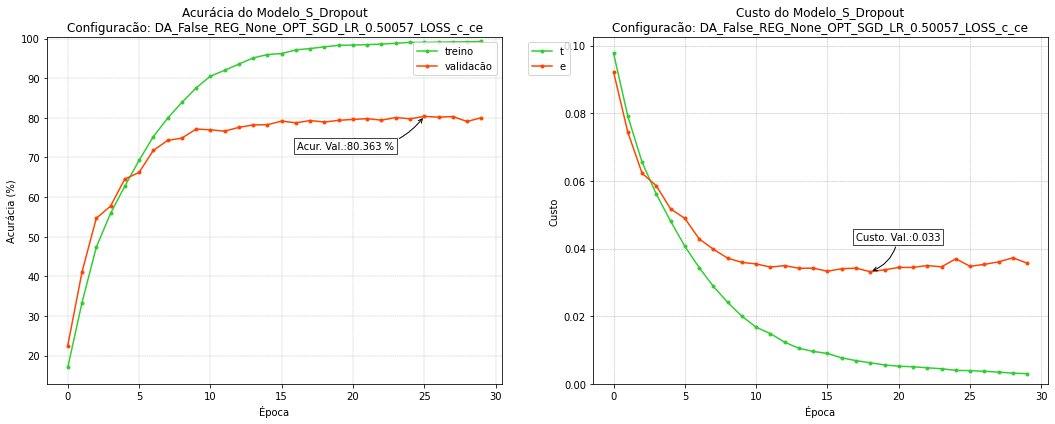

In [ ]:
graficos_metricas(hist_modelo_s_dp, modelo_s_dp, conf_modelo)

#### 5.2.2. Avaliacão do Modelo com Dropout




In [ ]:
score_s_dp = modelo_s_dp.evaluate(teste_dados, batch_size = tam_lote, verbose = 1)

62/62 [==============================] - 3s 46ms/step - loss: 0.0042 - accuracy: 0.9768


In [ ]:
  loaded_model = tf.keras.models.load_model(file_path)

### 5.3. Modelo_S com Batch Normalization

In [ ]:
modelo_s_br = cria_modelo_s_br()

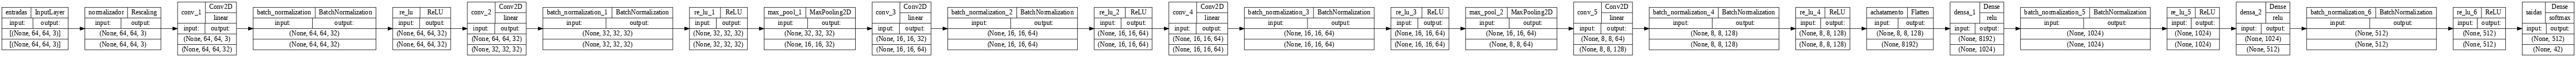

In [ ]:
desenha_modelo(modelo_s_br)
Image.open('/content/{}.png'.format(modelo_s_br.name))

In [ ]:
modelo_s_d_br = compila_modelo(modelo_s_br, **hiper)

Model: "Modelo_S_Batch_Norm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entradas (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 normalizador (Rescaling)    (None, 64, 64, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                               

#### 5.3.1. Treino do Modelo com Batch Norm


In [ ]:
hist_modelo_s_br = treina_modelo(modelo_s_br, val_loss_cb)

Epoch 1/30
1178/1178 [==============================] - 37s 30ms/step - loss: 0.0840 - accuracy: 0.4654 - val_loss: 0.0501 - val_accuracy: 0.6479
Epoch 2/30
1178/1178 [==============================] - 34s 29ms/step - loss: 0.0385 - accuracy: 0.7234 - val_loss: 0.0398 - val_accuracy: 0.7181
Epoch 3/30
1178/1178 [==============================] - 36s 31ms/step - loss: 0.0246 - accuracy: 0.8391 - val_loss: 0.0405 - val_accuracy: 0.7372
Epoch 4/30
1178/1178 [==============================] - 34s 29ms/step - loss: 0.0158 - accuracy: 0.9101 - val_loss: 0.0450 - val_accuracy: 0.7415
Epoch 5/30
1178/1178 [==============================] - 35s 30ms/step - loss: 0.0113 - accuracy: 0.9420 - val_loss: 0.0438 - val_accuracy: 0.7396
Epoch 6/30
1178/1178 [==============================] - 36s 31ms/step - loss: 0.0081 - accuracy: 0.9635 - val_loss: 0.0395 - val_accuracy: 0.7649
Epoch 7/30
1178/1178 [==============================] - 36s 30ms/step - loss: 0.0072 - accuracy: 0.9683 - val_loss: 0.0417 -

In [ ]:
#modelo_s_br.save("modelo_s_be_c_ce_val_accur_85", save_format='h5')

In [ ]:
guarda_historico(hist_modelo_s_br, modelo_s_br, conf_modelo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

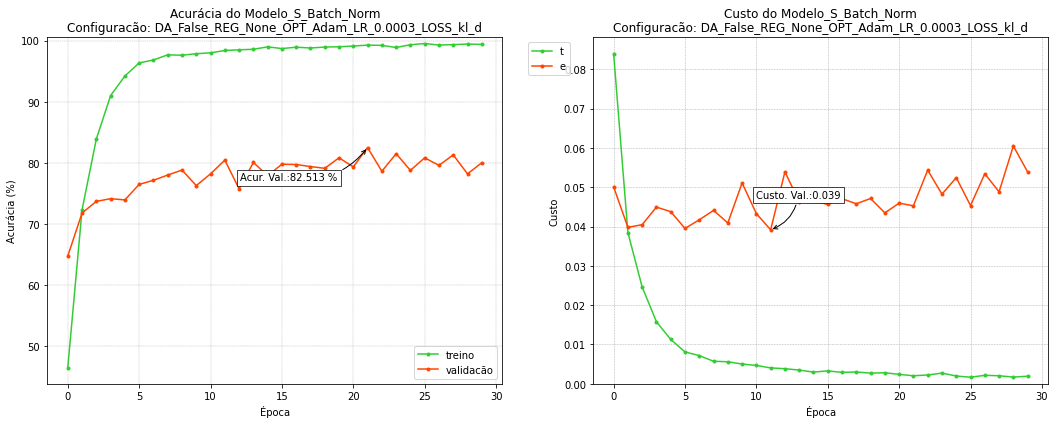

In [ ]:
graficos_metricas(hist_modelo_s_br, modelo_s_br, conf_modelo)

#### 5.3.2. Avaliacão do Modelo S com Batch Normalization

In [ ]:
score_s_br = modelo_s_br.evaluate(teste_dados, batch_size = tam_lote, verbose = 1)

62/62 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 0.9747


### 5.4. Sintonizacão da taxa de aprendizagem e momento do SGD com o Keras Tuner

In [ ]:
# Guia simples: https://keras.io/guides/keras_tuner/getting_started/
def build_model(hp):

  # modelo de base S
  modelo_s = cria_modelo_s()

  # hiperparâmetros a sintonizar
  lr = hp.Float("lr", min_value=1e-4, max_value=1, sampling="log")
  mom = hp.Float("mom", min_value= 1e-2, max_value=1, sampling="log")
  
  # compila modelo s 
  modelo_s.compile(
      optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = mom),
      loss= eval(hiper["loss"]),
      metrics=['accuracy'])
  
  return modelo_s

In [ ]:
build_model(keras_tuner.HyperParameters())

In [ ]:
# cria sintonizador de otimizacão bayesiana (existem outras variantes)
tuner = keras_tuner.BayesianOptimization(
    hypermodel=build_model,      
    objective="val_accuracy",    # objetivo: máximizar acurácia de validacão
    max_trials=10,               # número de tentativas              
    num_initial_points=4,
    alpha=0.0001,
    beta=2.6,
    seed=semente,
    directory="/content",        # diretório para guardar resultados
)

INFO:tensorflow:Reloading Oracle from existing project /content/untitled_project/oracle.json


In [ ]:
# sumário do espaco de procura
tuner.search_space_summary()

Search space summary
Default search space size: 2
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 1.0, 'step': None, 'sampling': 'log'}
mom (Float)
{'default': 0.01, 'conditions': [], 'min_value': 0.01, 'max_value': 1.0, 'step': None, 'sampling': 'log'}


In [ ]:
filename = 'hp_tuner_log.csv'
csv_logger = keras.callbacks.CSVLogger(filename, separator=",", append=True)

results =  tuner.search(treino_dados, 
                        epochs = 3,
                        verbose = 1,
                        shuffle = True, 
                        validation_data = validacao_dados,
                        callbacks=[csv_logger])

Trial 10 Complete [00h 11m 49s]
val_accuracy: 0.6072623133659363

Best val_accuracy So Far: 0.6569517254829407
Total elapsed time: 01h 59m 05s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# -------------------
# Resultados do Tuner
# -------------------
#  lr = 0.50057
#  momento = 0.26588
# -------------------

## 6. Aplicacão Gradio

### 6.1. Inferência

In [ ]:
def classifica_imagem(img):
  inp = img.reshape(-1,dim_img,dim_img,3)
  prediction = mod_best.predict(inp)[0]
  return {treino_dados.class_names[i]: float(prediction[i]) for i in range(len(treino_dados.class_names))}

### 6.2. Gradio: Interface de Utilizador 

In [ ]:
# (https://www.gradio.app/)
exemplos_img = []
for file in os.listdir("/content/drive/MyDrive/Simpsons"):
    if file.endswith(".jpg"):
        exemplos_img.append(os.path.join("/content/drive/MyDrive/Simpsons", file))

best_model = "/content/model.14-0.86.h5"
mod_best = keras.models.load_model(best_model)
saida_top5 = gradio.outputs.Label(num_top_classes=5)

gradio.Interface(
    fn = classifica_imagem,
    title = "Classificacão de personagens dos The Simpsons com Modelo S",
    description =  """Projecto para disciplina de Deep Learning do
                      Mestrado de Ciência de Dados, ESTG - Leiria, 2021/22. 
                      Elaborado por:
                      Ana Cunha, 
                      Andreia Ribeiro e
                      Tiago Ribeiro
                    """,
    inputs = gradio.inputs.Image(shape=(64, 64)), 
    outputs = saida_top5,
    examples = exemplos_img,                   # exemplos de imagens
    interpretation='default' ).launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://28514.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


## 7. Outros - VisualKeras

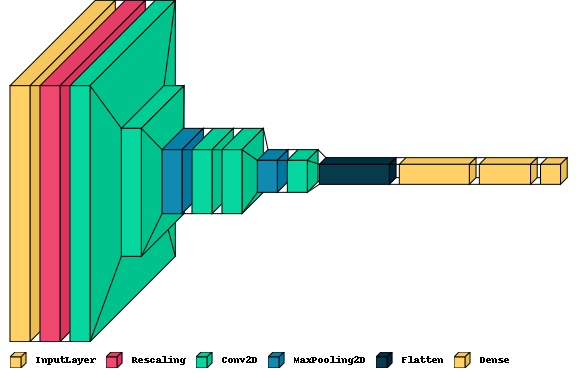

In [ ]:
# Esquema Modelo S
visualkeras.layered_view(modelo_s, scale_xy=4, legend=True, max_z=70)

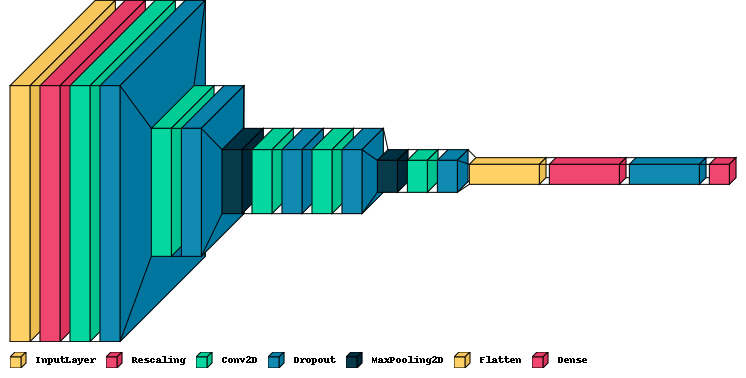

In [ ]:
# Esquema Modelo S + Dropout
visualkeras.layered_view(modelo_s_dp, scale_xy=4, legend=True, max_z=70)

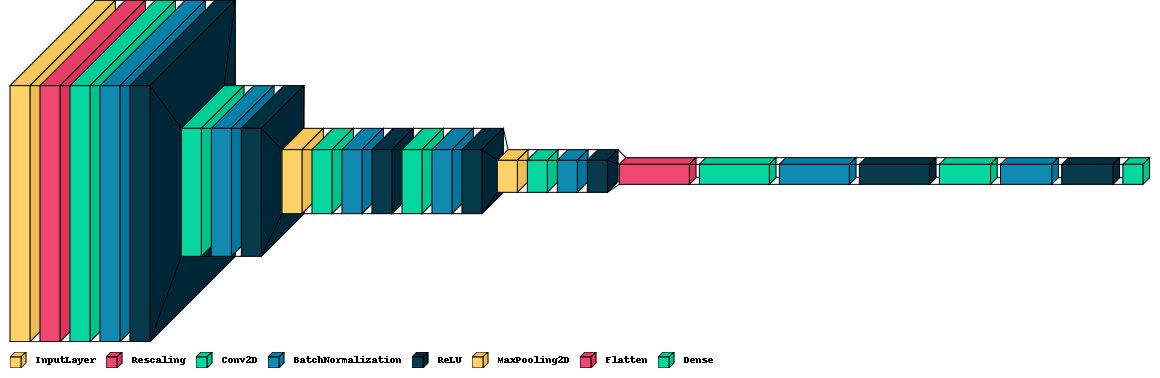

In [ ]:
# Esquema Modelo S + Batch Norm
visualkeras.layered_view(modelo_s_br, scale_xy=4, legend=True, max_z=70)

## Re-treino ! :)

In [ ]:
 # Re-treina melhor modelo mais 30 épocas com Aumento de Dados 
 history, loaded_model = carrega_treina_modelo_h5("/content/modelo_s_br_c_ce_val_x2")

Epoch 1/30
1178/1178 [==============================] - 50s 42ms/step - loss: 1.4276e-04 - accuracy: 0.9999 - val_loss: 0.0360 - val_accuracy: 0.8495
Epoch 2/30
1178/1178 [==============================] - 46s 39ms/step - loss: 9.7728e-05 - accuracy: 0.9999 - val_loss: 0.0351 - val_accuracy: 0.8476
Epoch 3/30
1178/1178 [==============================] - 46s 39ms/step - loss: 8.1627e-05 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 0.8471
Epoch 4/30
1178/1178 [==============================] - 46s 39ms/step - loss: 7.9513e-05 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.8519
Epoch 5/30
1178/1178 [==============================] - 46s 39ms/step - loss: 7.6115e-05 - accuracy: 0.9999 - val_loss: 0.0360 - val_accuracy: 0.8500
Epoch 6/30
1178/1178 [==============================] - 47s 40ms/step - loss: 6.9824e-05 - accuracy: 0.9999 - val_loss: 0.0343 - val_accuracy: 0.8581
Epoch 7/30
1178/1178 [==============================] - 46s 39ms/step - loss: 7.3388e-05 - accuracy:

In [ ]:
loaded_model.save("modelo_s_br_c_ce_val_x3", save_format='h5')

In [ ]:
# A melhor versão do modelo obteve 98,79 % de acurácia de teste
score = loaded_model.evaluate(teste_dados, batch_size = tam_lote, verbose = 1)

62/62 [==============================] - 1s 20ms/step - loss: 0.0031 - accuracy: 0.9879


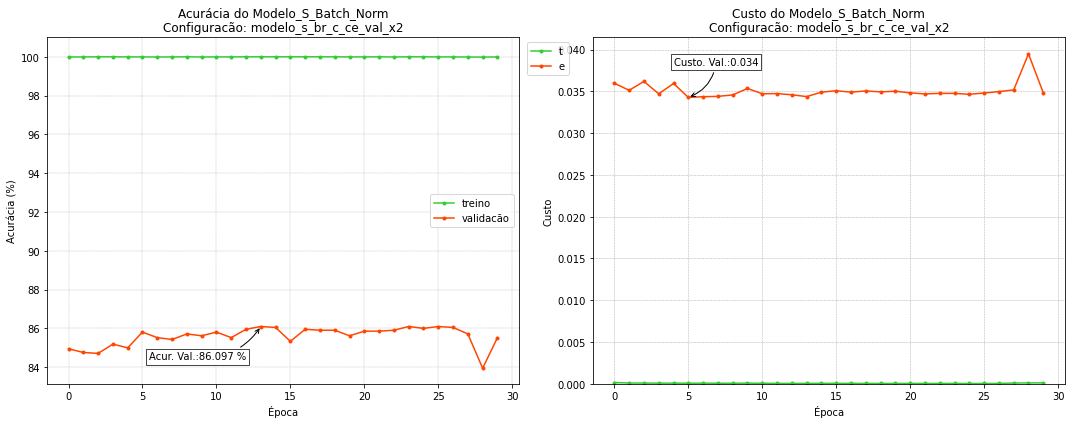

In [ ]:
graficos_metricas(history, loaded_model, "modelo_s_br_c_ce_val_x3")